In [ ]:
import numpy as np
import tensorflow as tf
import string
import re
from pickle import dump
from unicodedata import normalize
from numpy import array
from __future__ import absolute_import, division, print_function
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re
import nltk
import gensim.models.word2vec 
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%pylab inline
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
nltk.download("punkt")
nltk.download("stopwords")
from sklearn.decomposition import PCA


In [2]:
def load_doc(filename):
	# open the file as read only
	file = open(filename, mode='rt', encoding='utf-8')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [6]:
# load document
in_filename = '/hindiDataset/hin1.txt'
doc = load_doc(in_filename)
print(doc)

वाह!
बचाओ!
उछलो.
कूदो.
छलांग.
नमस्ते।
नमस्कार।
वाह-वाह!
चियर्स!
समझे कि नहीं?
मैं ठीक हूँ।
बहुत बढ़िया!
अंदर आ जाओ।
बाहर निकल जाओ!
चले जाओ!
ख़ुदा हाफ़िज़।
उत्तम!
सही!
आपका स्वागत है।
स्वागतम्।
मज़े करना।
मौज करना।
मज़े करो।
मैं भूल गया।
मैं भूल गई।
मैं पैसे दूंगा।
मैं ठीक हूँ।
मेरा पेट भर गया है।
चलो चलें!
मुझे जवाब दो।
पंछी उड़ते हैं।
माफ़ कीजिए।
बहुत ख़ूब!
मैं बेहोश हो गया।
खेद की बात है, लेकिन वैसा ही है।
मैं हँसा।
मैं बोर हो रहा हूँ।
मेरा दीवालिया हो चुका है।
मैं थक गया हूँ।
ठंड हो रही है।
कौन जाने?
किसको पता है?
किसे पता है?
किसे मालूम है?
अद्भुत
पंछी गाते हैं।
अंदर आ जाओ।
निश्चित ही
हिलो मत।
आग जलाती है।
उसका पीछा करो।
मैं थक गया हूँ।
मुझे तैरना आता है।
मैं तैर सकता हूँ।
मैं तुमसे प्यार करती हूँ।
मैं तुमसे प्यार करता हूँ।
मैं आपसे प्यार करता हूँ।
मैं आपसे प्यार करती हूँ।
मुझे तुमसे प्यार है।
मैं कोशिश करूँगा।
मैं आ रहा हूँ।
मुझे भूख लगी है!
मुझे भूख लगी है।
उसे अंदर भेजो।
उसे अंगर आने दो।
मुझे बाहर जाने दो!
और एक बार।
बैठिए।
क्या नया है?
नया क्या है?
वह कौन है?
चिल्लाओ मत!
चिल्ला

In [7]:
tokenizer = nltk.data.load('tokenizers/punkt/hindi.pickle')
#print(tokenizer)

In [8]:
raw_sentences = tokenizer.tokenize(doc)
#print(raw_sentences)

In [9]:
#convert into a list of words
#rtemove unnnecessary,, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    raw = raw.replace('--', ' ')
    tokens = raw.split()
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    #clean = re.sub("[^a-zA-Z]"," ", raw)
    #words = clean.split()
    return tokens

In [10]:
#sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))
print(sentences)        

[['वाह'], ['बचाओ'], ['उछलो'], ['कूदो'], ['छलांग'], ['नमस्ते।', 'नमस्कार।', 'वाहवाह'], ['चियर्स'], ['समझे', 'कि', 'नहीं'], ['मैं', 'ठीक', 'हूँ।', 'बहुत', 'बढ़िया'], ['अंदर', 'आ', 'जाओ।', 'बाहर', 'निकल', 'जाओ'], ['चले', 'जाओ'], ['ख़ुदा', 'हाफ़िज़।', 'उत्तम'], ['सही'], ['आपका', 'स्वागत', 'है।', 'स्वागतम्।', 'मज़े', 'करना।', 'मौज', 'करना।', 'मज़े', 'करो।', 'मैं', 'भूल', 'गया।', 'मैं', 'भूल', 'गई।', 'मैं', 'पैसे', 'दूंगा।', 'मैं', 'ठीक', 'हूँ।', 'मेरा', 'पेट', 'भर', 'गया', 'है।', 'चलो', 'चलें'], ['मुझे', 'जवाब', 'दो।', 'पंछी', 'उड़ते', 'हैं।', 'माफ़', 'कीजिए।', 'बहुत', 'ख़ूब'], ['मैं', 'बेहोश', 'हो', 'गया।', 'खेद', 'की', 'बात', 'है', 'लेकिन', 'वैसा', 'ही', 'है।', 'मैं', 'हँसा।', 'मैं', 'बोर', 'हो', 'रहा', 'हूँ।', 'मेरा', 'दीवालिया', 'हो', 'चुका', 'है।', 'मैं', 'थक', 'गया', 'हूँ।', 'ठंड', 'हो', 'रही', 'है।', 'कौन', 'जाने'], ['किसको', 'पता', 'है'], ['किसे', 'पता', 'है'], ['किसे', 'मालूम', 'है'], ['अद्भुत', 'पंछी', 'गाते', 'हैं।', 'अंदर', 'आ', 'जाओ।', 'निश्चित', 'ही', 'हिलो', 'मत।', 'आग', 'जला

In [11]:
#print(raw_sentences[10])
print(sentence_to_wordlist(raw_sentences[50]))

['उसके', 'पास', 'दाढ़ी', 'है।', 'वह', 'अभिनेता', 'है।', 'उसे', 'पैसों', 'की', 'ज़रूरत', 'है।', 'उसको', 'पैसों', 'की', 'कमी', 'थी।', 'मुझे', 'इतिहास', 'पसंद', 'है।', 'मुझे', 'यह', 'कुत्ता', 'अच्छा', 'लगता', 'है।', 'मुझे', 'एक', 'तो', 'खरीदना', 'ही', 'होगा।', 'मैं', 'वापस', 'आऊँगा।', 'मैं', 'तुम्हें', 'फ़ोन', 'करूँगा।', 'मैं', 'घर', 'पर', 'ही', 'रहूँगा।', 'मैं', 'अनीश्वरवादी', 'हूँ।', 'मैं', 'भगवान', 'में', 'यकीन', 'नहीं', 'करता।', 'मैं', 'बहुत', 'थक', 'गया', 'हूँ।', 'आज', 'मौसम', 'बहुत', 'गरम', 'है।', 'यह', 'किताब', 'है।', 'तुम्हारी', 'चाल', 'है।', 'भगवान', 'जाने।', 'गर्मियाँ', 'खतम', 'हों', 'चुकीं', 'हैं।', 'आराम', 'से', 'आओ।', 'सोच', 'लो।', 'यह', 'एक', 'किताब', 'है।', 'यह', 'किताब', 'है।', 'यह', 'मेरा', 'बस्ता', 'है।', 'यह', 'मेरा', 'कुत्ता', 'है।', 'अपने', 'पैर', 'धोओ।', 'हम', 'संगीत', 'की', 'पढ़ाई', 'करते', 'हैं।', 'हम', 'आपको', 'फ़ोन', 'करेंगे।', 'हम', 'आपको', 'बुलाएँगे।', 'तुम', 'कहाँ', 'थे']


In [12]:
token_count = sum([len(sentence) for sentence in sentences])
print("The hindi corpus contains {0:,} tokens".format(token_count))

The hindi corpus contains 19,512 tokens


In [13]:
from gensim.models import Word2Vec
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['stays'])
# save model
model.save('model1.bin')
# load model
new_model = Word2Vec.load('model1.bin')
print(new_model)

2018-07-16 13:24:06,884 : INFO : collecting all words and their counts
2018-07-16 13:24:06,886 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-07-16 13:24:06,893 : INFO : collected 3027 word types from a corpus of 19512 raw words and 497 sentences
2018-07-16 13:24:06,894 : INFO : Loading a fresh vocabulary
2018-07-16 13:24:06,903 : INFO : min_count=1 retains 3027 unique words (100% of original 3027, drops 0)
2018-07-16 13:24:06,904 : INFO : min_count=1 leaves 19512 word corpus (100% of original 19512, drops 0)
2018-07-16 13:24:06,915 : INFO : deleting the raw counts dictionary of 3027 items
2018-07-16 13:24:06,916 : INFO : sample=0.001 downsamples 61 most-common words
2018-07-16 13:24:06,917 : INFO : downsampling leaves estimated 15050 word corpus (77.1% of prior 19512)
2018-07-16 13:24:06,926 : INFO : estimated required memory for 3027 words and 100 dimensions: 3935100 bytes
2018-07-16 13:24:06,927 : INFO : resetting layer weights
2018-07-16 13:24:06,99

Word2Vec(vocab=3027, size=100, alpha=0.025)
['वाह', 'बचाओ', 'उछलो', 'कूदो', 'छलांग', 'नमस्ते।', 'नमस्कार।', 'वाहवाह', 'चियर्स', 'समझे', 'कि', 'नहीं', 'मैं', 'ठीक', 'हूँ।', 'बहुत', 'बढ़िया', 'अंदर', 'आ', 'जाओ।', 'बाहर', 'निकल', 'जाओ', 'चले', 'ख़ुदा', 'हाफ़िज़।', 'उत्तम', 'सही', 'आपका', 'स्वागत', 'है।', 'स्वागतम्।', 'मज़े', 'करना।', 'मौज', 'करो।', 'भूल', 'गया।', 'गई।', 'पैसे', 'दूंगा।', 'मेरा', 'पेट', 'भर', 'गया', 'चलो', 'चलें', 'मुझे', 'जवाब', 'दो।', 'पंछी', 'उड़ते', 'हैं।', 'माफ़', 'कीजिए।', 'ख़ूब', 'बेहोश', 'हो', 'खेद', 'की', 'बात', 'है', 'लेकिन', 'वैसा', 'ही', 'हँसा।', 'बोर', 'रहा', 'दीवालिया', 'चुका', 'थक', 'ठंड', 'रही', 'कौन', 'जाने', 'किसको', 'पता', 'किसे', 'मालूम', 'अद्भुत', 'गाते', 'निश्चित', 'हिलो', 'मत।', 'आग', 'जलाती', 'उसका', 'पीछा', 'तैरना', 'आता', 'तैर', 'सकता', 'तुमसे', 'प्यार', 'करती', 'करता', 'आपसे', 'कोशिश', 'करूँगा।', 'भूख', 'लगी', 'उसे', 'भेजो।', 'अंगर', 'आने', 'दो', 'और', 'एक', 'बार।', 'बैठिए।', 'क्या', 'नया', 'वह', 'चिल्लाओ', 'मत', 'चिल्लाईए', 'खड़ा', 'ताकतवर', 'आप

KeyError: "word 'stays' not in vocabulary"

In [14]:
#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1


In [15]:
from gensim.models import Word2Vec
hindi2vec = Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [16]:
hindi2vec.build_vocab(sentences)

2018-07-16 13:24:15,044 : INFO : collecting all words and their counts
2018-07-16 13:24:15,045 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-07-16 13:24:15,051 : INFO : collected 3027 word types from a corpus of 19512 raw words and 497 sentences
2018-07-16 13:24:15,053 : INFO : Loading a fresh vocabulary
2018-07-16 13:24:15,057 : INFO : min_count=3 retains 988 unique words (32% of original 3027, drops 2039)
2018-07-16 13:24:15,058 : INFO : min_count=3 leaves 16993 word corpus (87% of original 19512, drops 2519)
2018-07-16 13:24:15,063 : INFO : deleting the raw counts dictionary of 3027 items
2018-07-16 13:24:15,064 : INFO : sample=0.001 downsamples 66 most-common words
2018-07-16 13:24:15,065 : INFO : downsampling leaves estimated 12165 word corpus (71.6% of prior 16993)
2018-07-16 13:24:15,069 : INFO : estimated required memory for 988 words and 300 dimensions: 2865200 bytes
2018-07-16 13:24:15,071 : INFO : resetting layer weights


In [17]:
print("Word2Vec vocabulary length:", len(hindi2vec.wv.vocab))

Word2Vec vocabulary length: 988


In [ ]:
hindi2vec.train(sentences,total_examples=model.corpus_count(),epochs=model.iter)

In [19]:
from gensim.models import Word2Vec
hindi2vec = Word2Vec(sentences,
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

2018-07-16 13:24:30,120 : INFO : collecting all words and their counts
2018-07-16 13:24:30,121 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-07-16 13:24:30,127 : INFO : collected 3027 word types from a corpus of 19512 raw words and 497 sentences
2018-07-16 13:24:30,129 : INFO : Loading a fresh vocabulary
2018-07-16 13:24:30,134 : INFO : min_count=3 retains 988 unique words (32% of original 3027, drops 2039)
2018-07-16 13:24:30,135 : INFO : min_count=3 leaves 16993 word corpus (87% of original 19512, drops 2519)
2018-07-16 13:24:30,141 : INFO : deleting the raw counts dictionary of 3027 items
2018-07-16 13:24:30,142 : INFO : sample=0.001 downsamples 66 most-common words
2018-07-16 13:24:30,143 : INFO : downsampling leaves estimated 12165 word corpus (71.6% of prior 16993)
2018-07-16 13:24:30,147 : INFO : estimated required memory for 988 words and 300 dimensions: 2865200 bytes
2018-07-16 13:24:30,148 : INFO : resetting layer weights
2018-07-16 13:24:30,

In [20]:
if not os.path.exists("trained"):
    os.makedirs("trained")

In [21]:
hindi2vec.save(os.path.join("trained", "hindi2vec.wv"))

2018-07-16 13:24:37,923 : INFO : saving Word2Vec object under trained/hindi2vec.wv, separately None
2018-07-16 13:24:37,924 : INFO : not storing attribute vectors_norm
2018-07-16 13:24:37,927 : INFO : not storing attribute cum_table
2018-07-16 13:24:37,960 : INFO : saved trained/hindi2vec.wv


In [22]:
hindi2vec = Word2Vec.load(os.path.join("trained", "hindi2vec.wv"))

2018-07-16 13:24:39,372 : INFO : loading Word2Vec object from trained/hindi2vec.wv
2018-07-16 13:24:39,401 : INFO : loading wv recursively from trained/hindi2vec.wv.wv.* with mmap=None
2018-07-16 13:24:39,401 : INFO : setting ignored attribute vectors_norm to None
2018-07-16 13:24:39,402 : INFO : loading vocabulary recursively from trained/hindi2vec.wv.vocabulary.* with mmap=None
2018-07-16 13:24:39,403 : INFO : loading trainables recursively from trained/hindi2vec.wv.trainables.* with mmap=None
2018-07-16 13:24:39,404 : INFO : setting ignored attribute cum_table to None
2018-07-16 13:24:39,405 : INFO : loaded trained/hindi2vec.wv


In [ ]:
X = model[hindi2vec.wv.vocab]

In [21]:
#my video - how to visualize a dataset easily
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [ ]:
all_word_vectors_matrix = hindi2vec.wv.syn0

In [23]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [24]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[hindi2vec.wv.vocab[word].index])
            for word in hindi2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [25]:
points.head(20)

,word,x,y
0,कि,-4.502109,26.318150
1,नहीं,-4.627900,26.342613
2,मैं,-6.256188,29.139967
3,ठीक,16.078369,13.204913
4,हूँ।,-6.287096,29.083220
5,बहुत,3.502518,21.166134
6,अंदर,12.838200,-2.081300
7,आ,2.147037,27.736546
8,जाओ।,15.162557,6.124711
9,बाहर,14.889318,15.291143


In [26]:
sns.set_context("poster")

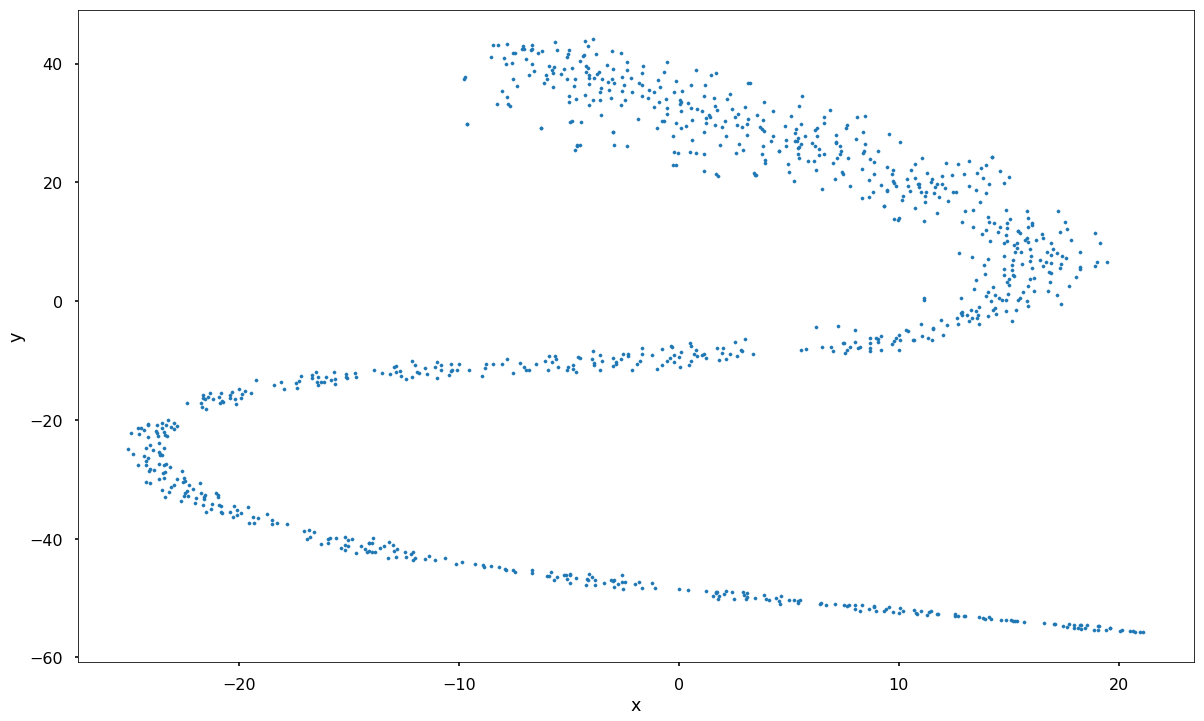

In [27]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [28]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

In [ ]:
plot_region(x_bounds=(4.0, 4.2), y_bounds=(-0.5, -0.1))

In [23]:
hindi2vec.most_similar("प्यार")

/Users/pankajverma/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
2018-07-16 13:24:56,157 : INFO : precomputing L2-norms of word weight vectors


[('आपसे', 0.9997799396514893),
 ('तुमसे', 0.9997720718383789),
 ('चाहता', 0.9997662901878357),
 ('करता', 0.9997653365135193),
 ('मिलना', 0.9997625946998596),
 ('खुश', 0.9997325539588928),
 ('चाह्ता', 0.9997314810752869),
 ('करती', 0.9997298717498779),
 ('मिलने', 0.9997246265411377),
 ('सहमत', 0.9997196793556213)]

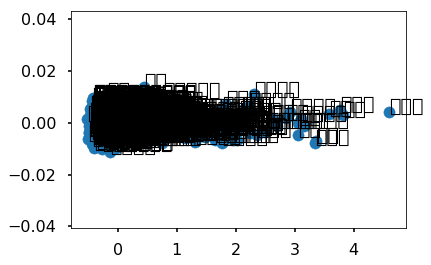

In [32]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(hindi2vec.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [24]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = hindi2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [25]:
nearest_similarity_cosmul("मैं", "नहीं", "तुम")
#nearest_similarity_cosmul("win", "defeat", "Rahul")

मैं is related to नहीं, as चाहता is related to तुम


/Users/pankajverma/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


'चाहता'

In [1]:
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
import numpy as np
import gensim

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
#from gensim import model.wv.vocab


In [27]:
fname = "trained/hindi2vec.wv"
model = Word2Vec.load(fname)

2018-07-16 13:25:09,924 : INFO : loading Word2Vec object from trained/hindi2vec.wv
2018-07-16 13:25:09,949 : INFO : loading wv recursively from trained/hindi2vec.wv.wv.* with mmap=None
2018-07-16 13:25:09,950 : INFO : setting ignored attribute vectors_norm to None
2018-07-16 13:25:09,951 : INFO : loading vocabulary recursively from trained/hindi2vec.wv.vocabulary.* with mmap=None
2018-07-16 13:25:09,952 : INFO : loading trainables recursively from trained/hindi2vec.wv.trainables.* with mmap=None
2018-07-16 13:25:09,953 : INFO : setting ignored attribute cum_table to None
2018-07-16 13:25:09,954 : INFO : loaded trained/hindi2vec.wv


In [28]:
max_size = len(hindi2vec.wv.vocab)-1

In [29]:
w2v = np.zeros((max_size,model.layer1_size))


/Users/pankajverma/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `layer1_size` (Attribute will be removed in 4.0.0, use self.trainables.layer1_size instead).
  if __name__ == '__main__':


In [30]:
w2v

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
with open("metadata.tsv", 'w+') as file_metadata:
    for i,word in enumerate(model.wv.index2word[:max_size]):
        w2v[i] = hindi2vec.wv[word]
        file_metadata.write(word + '\n')

In [32]:
w2v

array([[-0.05676296, -0.09081452, -0.03319879, ..., -0.00806938,
        -0.09569554,  0.09837551],
       [-0.06257696, -0.08908154, -0.03709842, ..., -0.0055402 ,
        -0.09267499,  0.09624208],
       [-0.06065165, -0.08918639, -0.03467787, ..., -0.00772093,
        -0.09328195,  0.09563808],
       ...,
       [-0.04695977, -0.06970424, -0.02851942, ..., -0.00213008,
        -0.0753278 ,  0.07763889],
       [-0.05091079, -0.07591764, -0.0329967 , ..., -0.00331529,
        -0.08144331,  0.08479021],
       [-0.05385508, -0.08166557, -0.03489505, ..., -0.00549946,
        -0.08320572,  0.08684041]])

In [33]:
sess = tf.InteractiveSession()

In [34]:
#Let us create a 2D tensor called embedding that holds our embeddings.
with tf.device("/cpu:0"):
    embedding = tf.Variable(w2v, trainable=False, name='embedding')

In [35]:
tf.global_variables_initializer().run()

In [36]:
path = 'tensorboard6'

In [37]:
# let us create an object to Saver class which is actually used to 
#save and restore variables to and from our checkpoints
saver = tf.train.Saver()

In [38]:
# using file writer, we can save our summaries and events to our event file.
writer = tf.summary.FileWriter(path, sess.graph)

In [39]:
# adding into projector
config = projector.ProjectorConfig()
embed = config.embeddings.add()
embed.tensor_name = 'embedding'
embed.metadata_path = 'metadata.tsv'

In [40]:
# Specify the width and height of a single thumbnail.
projector.visualize_embeddings(writer, config)

saver.save(sess, path+'/model.ckpt', global_step=max_size)

'tensorboard6/model.ckpt-987'